# One dimensional Brownian search
*11-Nov-21* 




Searching or search processes, in particular random search processes, have recently attracted interest among scientists and practitioners for various reasons: to understand food search strategies of animals and diffusion control of molecular processes in biological cells, but also to improve web search engines and optimize search processes for military tasks (locating enemy vessels or mines).  An essential part of all these processes and applications are various forms of (continuous or discrete time) random walk models. Random search processes based on scale-free, Levy stable jump length distributions (Levy flights) in the absence and presence of an external drift (underwater current, atmospheric wind, a preference of the walker owing to prior experience, or a general bias in an abstract search space), have attracted much attention in the recent years. In computer science and data mining (information retrieval) one particular popular search method is based on a random walk model in which a combination of local and long-range search is implemented: a surfer (walker) visits local neighbors but occasionally visits different regions of the graph, performing (possible) long jumps.

Many studies on random searches have employed the Brownian search as a default strategy in foraging theory with incomplete information, while others have proposed Levy flights as an efficient strategy in searching for sufficiently sparse targets, stating that the Levy process is one of the most natural and optimal in the search strategy. 
The corresponding Fokker-Planck equation of a Brownian random search process for the non-normalized density function $f(x,t)$ with a $\delta$-sink of strength $\mathcal{P}_{\textrm{fa}}$ reads

<br>

\begin{align}
\frac{\partial}{\partial t}f(x,t)=\mathcal{D}\frac{\partial^{2}}{\partial x^2} f(x,t)-\mathcal{P}_{\mathrm{fa}}(t)\delta(x-X),
\end{align}

<br>


where $\mathcal{D}$ is a diffusion coefficient. One assumes here that the initial position is given at $x=x_0$ by $f(x,t=0)=\delta(x-x_0)$. The $\delta$-sink means that the random searcher positioned at the beginning at $x=x_{0}$,  will be removed at the first arrival at $x=X$, i.e., $f(x=X,t)=0$. Therefore, $\mathcal{P}_{\mathrm{fa}}(t)$ represents the *first arrival time distribution (FATD)*, obtained from 

<br>


\begin{align}
\mathcal{P}_{\mathrm{fa}}(t)=-\frac{d}{dt}\int_{-\infty}^{\infty}f(x,t)\,dx=-\frac{d}{dt}\mathcal{S}(t),    
\end{align}

<br>


which is a negative time derivative of the *survival probability* $\mathcal{S}(t)=\int_{-\infty}^{\infty}f(x,t)\,dx$. It is given by


<br>


\begin{align}
    \mathcal{P}_{\textrm{fa}}(t)=\frac{|X-x_0|}{\sqrt{4\pi\mathcal{D}t^{3}}}\times e^{-\frac{(X-x_0)^2}{4\mathcal{D}t}}
\end{align}


<br>


with the long time asymptotics, $\mathcal{P}_{\textrm{fa}}(t)\sim |X-x_0|t^{-3/2}$. Other important characteristics of searching are the *search reliability* and the *efficiency*. The search reliability is accounted as the cumulative arrival probability


<br>



\begin{align}
\mathcal{E}=\left\langle\frac{1}{t}\right\rangle=\int_{0}^{\infty}\mathcal{P}_{\mathrm{fa}}(s)\,ds
\end{align}

which for the Brownian search is $\mathcal{P}=1$. This means that the the searcher will find the target with the probability 1, while the search efficiency,

<br>


\begin{align}
\mathcal{E}=\left\langle\frac{1}{t}\right\rangle=\int_{0}^{\infty}\mathcal{P}_{\mathrm{fa}}(s)\,ds
\end{align}

<br>



represents the averaged inverse search time. Here $\mathcal{P}_{\mathrm{fa}}(s)=\mathcal{L}\left[\mathcal{P}_{\mathrm{fa}}(t)\right](s)=\int_{0}^{\infty}\wp_{\textrm{fa}}(t)e^{-st}\,dt$ is the Laplace image of $\mathcal{P}_{\mathrm{fa}}(t)$. For the one-dimensional Brownian search, it is given by

\begin{align}
    \mathcal{E}=\frac{2\mathcal{D}}{(X-x_0)^{2}}.
\end{align}

# A. Main class

In [1]:
"""

 Created on 17-Oct-21
 @author: Kiril Zelenkovski

 Multiprocessing example for simulating FATD using Langevin Eq.

"""

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import (AutoMinorLocator)
from multiprocessing import Pool

# Define parameters for BM process
global n, V, dt, x0, simulation_time, Dcx, X, d, sqrt_2D_dt, sqrt_dt
n = 100_000           # Size of Ensemble
V = 0                 # Drift for the diffusion process, v - external force (drift)
dt = 0.001            # dt = interval_size
x0 = 2                # y0 - starting point
simulation_time = 15  # tt - total time for each simulation
Dcx = 1               # Diffusion coefficient
X = 0                 # Arrival destination


# Arrival confidence interval (+-d)
d = (2 * Dcx * dt) ** 0.5  

# Calculate for faster usage
sqrt_2D_dt = (2 * Dcx * dt) ** 0.5
sqrt_dt = dt ** 0.5


def brownian_search(i=0):
    s = [x0]
    t = 0
    time_current = 0

    # Loop over time
    while True:
        if X - d <= s[t] <= X + d and len(s) > 1:
            # print(np.round(s[t], 5))
            return time_current

        if time_current > 100:
            return time_current

        s.insert(t + 1, s[t] + sqrt_2D_dt * np.random.normal())
        t += 1
        time_current += dt

# B. Simulate FATD

Simulate the FATD by using Langevin equation approach:
- $N=10^5$ - Ensemble size
- $dt=0.01$ - Interval size
- $D_x=1$ - Diffusion coefficient
- $x_0=2$ - Starting point for each process
- $X=0$ - Arrival/stopping point that we are intrested in  

In [2]:
# Create pool for multiprocessing
print("------------------------Started calculating FATD, X------------------------")
pool = Pool(5)
# fatd_s = np.array(pool.map(brownian_search, range(n)))
fatd_s = list(tqdm(pool.imap(brownian_search, range(n)), total=n))
pool.terminate()
print("\n")

time = np.arange(0.01, simulation_time + 1, 0.01)

print("\nd: ", d)
print("Length: ", len(fatd_s))
print("AVG: ", np.average(fatd_s))
print("MAX: ", np.max(fatd_s))
print("MIN: ", np.min(fatd_s))
print("time: ", len(time))

------------------------Started calculating FATD, X------------------------


100%|██████████| 100000/100000 [2:14:45<00:00, 12.37it/s]




d:  0.044721359549995794
Length:  100000
AVG:  20.668476360012917
MAX:  100.00000000011343
MIN:  0.08800000000000006
time:  1599


## Results

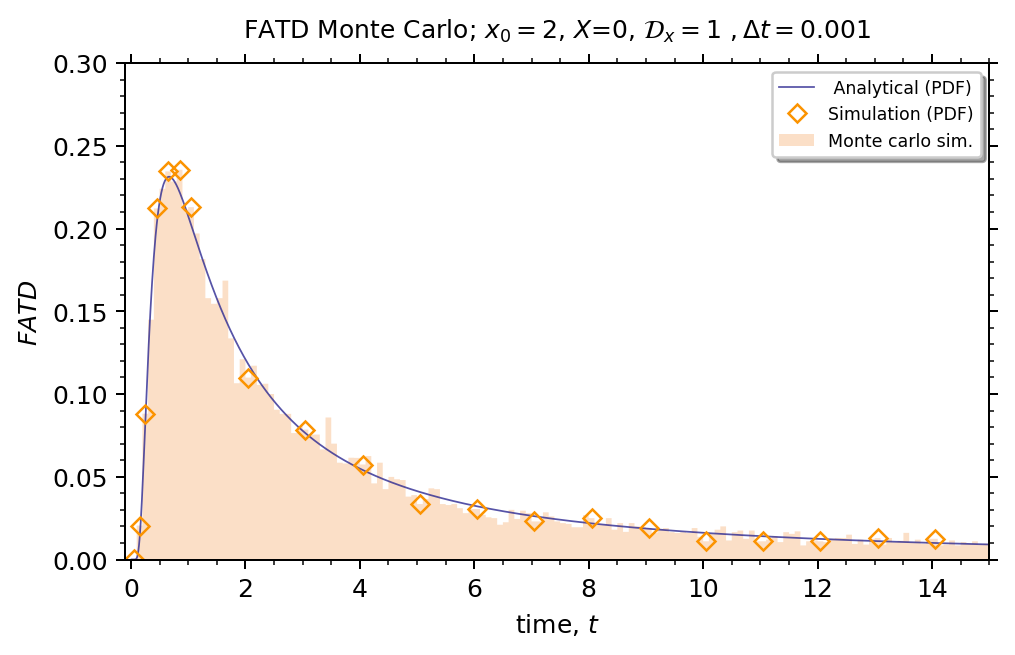

In [18]:
# FATD figure
fig, (ax) = plt.subplots(1, 1, figsize=(6, 4), dpi=180)
time = np.arange(0.01, simulation_time + 1, 0.01)

# First Arrival Time Distribution - analytical
fatd_a = [(np.abs(X - x0) / (4 * np.pi * Dcx) ** 0.5) * np.exp(-np.square(X - x0) / (4 * Dcx * x)) * (
        1 / math.sqrt(math.pow(x, 3))) for x in time]
ax.plot(time, fatd_a, linewidth=0.7, alpha=0.8, label=r" Analytical (PDF)", color="#2C2891")

# Calculate bins
step = 0.1
start = np.floor(min(fatd_s) / step) * step
stop = max(fatd_s) + step
bin_edges = np.arange(start, stop, step=step)

# Calculate bin centers
hist, edges = np.histogram(fatd_s, bins=bin_edges, density=True)
centers = 0.5 * (edges[1:] + edges[:-1])
# print(centers)

# Plot histogram, markers
markers_on = [0, 1, 2, 4, 6, 8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
plt.plot(centers, hist, color='#FB9300', label=r"Simulation (PDF)", marker="D", markerfacecolor='None', linestyle='None', markersize=5, markevery=markers_on)

# Plot actual data bins
plt.hist(fatd_s, bins=bin_edges, histtype='stepfilled', density=True, facecolor='sandybrown', alpha=0.35,
         label=r"Monte carlo sim.")

# Figure tweaks
# plt.axvline(x=0.72, linewidth=.5, alpha=1., color="black", linestyle='--')

plt.legend(loc='upper right',
            fancybox=True,
            shadow=True,
            fontsize='x-small')

ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_ticks_position('both')
plt.ylabel(r"$FATD$")
plt.ylim(0.0, 0.30)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_ticks_position('both')
plt.xlim(-0.1, simulation_time)
plt.xlabel(r"time, $t$")

plt.title(
    r"FATD Monte Carlo; $x_0=2$, $X$={x}, ".format(x=X) + r"$\mathcal{D}_x=$" + r"{D} $, \Delta t=${delt}".format(D=Dcx,
                                                                                                            delt=dt),
    fontdict={'size': 10}, pad=10)
plt.tight_layout(pad=2)
plt.show()